# **1. Mount Drive**


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Setup environment & import library**


---



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Visual settings
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')

# **3. Load Dataset**
**Dataset 1 :**
Jumlah Pasien Rawat Darurat Menurut Cara Keluar Berdasarkan Jenis Rujukan **(IGD)**


---



In [ ]:
pd.set_option('display.max_columns', None)   # tampilkan semua kolom
pd.set_option('display.width', 200)          # atur lebar tampilan

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Mining/DataPasienIGD_Keluar&Rujukan.csv")

In [ ]:
df.head()

,id,id_index,kode_provinsi,nama_provinsi,periode_update,cara_keluar,kategori,jumlah,satuan,tahun
0,1,1,35,JAWA TIMUR,2018-01,MENINGGAL,NON RUJUKAN,16,PASIEN,2018
1,1,2,35,JAWA TIMUR,2018-01,MENINGGAL,RUJUKAN,26,PASIEN,2018
2,1,3,35,JAWA TIMUR,2018-01,MENINGGAL,TOTAL,42,PASIEN,2018
3,2,4,35,JAWA TIMUR,2018-01,DIRUJUK,NON RUJUKAN,1,PASIEN,2018
4,2,5,35,JAWA TIMUR,2018-01,DIRUJUK,RUJUKAN,1,PASIEN,2018


**Dataset 2 :**
Jumlah Pasien Rawat Jalan Menurut Klinik Berdasarkan Jenis Kelamin **(RJ)**

---



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data Mining/DataPasien_RawatJalan.csv")

In [ ]:
data.head()

,id,id_index,kode_provinsi,nama_provinsi,periode_update,klinik,kategori,jumlah,satuan,tahun
0,35,10435,35,JAWA TIMUR,2018-02,THT,PEREMPUAN,634,PASIEN,2018
1,35,10335,35,JAWA TIMUR,2018-02,THT,LAKI LAKI,638,PASIEN,2018
2,34,10234,35,JAWA TIMUR,2018-02,MATA,TOTAL,1681,PASIEN,2018
3,34,10134,35,JAWA TIMUR,2018-02,MATA,PEREMPUAN,888,PASIEN,2018
4,34,10034,35,JAWA TIMUR,2018-02,MATA,LAKI LAKI,793,PASIEN,2018


# **4. Preview Dataset**

**Dataset 1**

Menampilkan beberapa preview dari datasetnya yakni :
*   Informasi umum atribut dataset
*   Cek dataset (bernilai null atau tidak)
*   Cek informasi statistik dari atribut dataset



**Informasi umum atribut dataset   IGD**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1809 non-null   int64 
 1   id_index        1809 non-null   int64 
 2   kode_provinsi   1809 non-null   int64 
 3   nama_provinsi   1809 non-null   object
 4   periode_update  1809 non-null   object
 5   cara_keluar     1809 non-null   object
 6   kategori        1809 non-null   object
 7   jumlah          1809 non-null   int64 
 8   satuan          1809 non-null   object
 9   tahun           1809 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 141.5+ KB


**Cek dataset IGD (bernilai null atau tidak)**

---



In [ ]:
print(df.isnull().sum())

id                0
id_index          0
kode_provinsi     0
nama_provinsi     0
periode_update    0
cara_keluar       0
kategori          0
jumlah            0
satuan            0
tahun             0
dtype: int64


**Cek informasi statistik dari atribut dataset IGD**

---



In [ ]:
df.describe()

,id,id_index,kode_provinsi,jumlah,tahun
count,1809.000000,1809.000000,1809.0,1809.000000,1809.000000
mean,302.000000,905.000000,35.0,207.110006,2021.537313
std,174.118999,522.357636,0.0,390.219965,2.237766
min,1.000000,1.000000,35.0,0.000000,2018.000000
25%,151.000000,453.000000,35.0,0.000000,2020.000000
50%,302.000000,905.000000,35.0,24.000000,2022.000000
75%,453.000000,1357.000000,35.0,190.000000,2023.000000
max,603.000000,1809.000000,35.0,1850.000000,2025.000000


**Dataset 2**

Menampilkan beberapa preview dari datasetnya yakni :
*   Informasi umum atribut dataset
*   Cek dataset (bernilai null atau tidak)
*   Cek informasi statistik dari atribut dataset

**Informasi umum atribut dataset RJ**

---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5737 non-null   int64 
 1   id_index        5737 non-null   int64 
 2   kode_provinsi   5737 non-null   int64 
 3   nama_provinsi   5737 non-null   object
 4   periode_update  5737 non-null   object
 5   klinik          5737 non-null   object
 6   kategori        5737 non-null   object
 7   jumlah          5737 non-null   int64 
 8   satuan          5737 non-null   object
 9   tahun           5737 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 448.3+ KB


**Cek dataset RJ (bernilai null atau tidak)**

---



In [ ]:
print(data.isnull().sum())

id                0
id_index          0
kode_provinsi     0
nama_provinsi     0
periode_update    0
klinik            0
kategori          0
jumlah            0
satuan            0
tahun             0
dtype: int64


**Cek informasi statistik dari atribut dataset RJ**

---



In [ ]:
data.describe()

,id,id_index,kode_provinsi,jumlah,tahun
count,5737.000000,5.737000e+03,5737.0,5737.000000,5737.000000
mean,1078.220150,2.613756e+07,35.0,726.936378,2021.447098
std,616.168904,2.386944e+07,0.0,824.361763,2.200315
min,1.000000,1.100000e+01,35.0,1.000000,2018.000000
25%,538.000000,1.612538e+06,35.0,207.000000,2020.000000
50%,1091.000000,3.273109e+07,35.0,469.000000,2021.000000
75%,1609.000000,4.825161e+07,35.0,983.000000,2023.000000
max,2143.000000,6.429214e+07,35.0,6829.000000,2025.000000


Setelah Load & Preview Dataset dilakukan ternyata dataset yang digunakan yakni :

* Dataset 1 = IGD
* Dataset 2 = RJ

sudah bersih dan siap dilakukan proses selanjutnya

# **5. Mengambil data pada tahun 2018-2025**

**Ambil data pada dataset pertama dari tahun 2023-2025**

---



In [ ]:
filtered_df = df[df['tahun'].isin([2018,2019,2020,2021,2022,2023,2024,2025])]
filtered_df['cara_keluar'] = filtered_df['cara_keluar'].astype(str).str.strip()
filtered_df = filtered_df[filtered_df['cara_keluar'] != '0']
filtered_df = filtered_df[filtered_df['cara_keluar'] != '']

In [ ]:
filtered_df.head()

,id,id_index,kode_provinsi,nama_provinsi,periode_update,cara_keluar,kategori,jumlah,satuan,tahun
0,1,1,35,JAWA TIMUR,2018-01,MENINGGAL,NON RUJUKAN,16,PASIEN,2018
1,1,2,35,JAWA TIMUR,2018-01,MENINGGAL,RUJUKAN,26,PASIEN,2018
2,1,3,35,JAWA TIMUR,2018-01,MENINGGAL,TOTAL,42,PASIEN,2018
3,2,4,35,JAWA TIMUR,2018-01,DIRUJUK,NON RUJUKAN,1,PASIEN,2018
4,2,5,35,JAWA TIMUR,2018-01,DIRUJUK,RUJUKAN,1,PASIEN,2018


**Ambil data pada dataset kedua dari tahun 2018-2025**

---



In [ ]:
fil_data = data[data['tahun'].isin([2018,2019,2020,2021,2022,2023,2024,2025])]
fil_data['klinik'] = fil_data['klinik'].astype(str).str.strip()
fil_data = fil_data[fil_data['klinik'] != '0']
fil_data = fil_data[fil_data['klinik'] != '']

In [ ]:
fil_data.head()

,id,id_index,kode_provinsi,nama_provinsi,periode_update,klinik,kategori,jumlah,satuan,tahun
0,35,10435,35,JAWA TIMUR,2018-02,THT,PEREMPUAN,634,PASIEN,2018
1,35,10335,35,JAWA TIMUR,2018-02,THT,LAKI LAKI,638,PASIEN,2018
2,34,10234,35,JAWA TIMUR,2018-02,MATA,TOTAL,1681,PASIEN,2018
3,34,10134,35,JAWA TIMUR,2018-02,MATA,PEREMPUAN,888,PASIEN,2018
4,34,10034,35,JAWA TIMUR,2018-02,MATA,LAKI LAKI,793,PASIEN,2018


# **6. Menerapkan Pivot Dataset**

**Dataset Pertama :**

Mengubah data IGD biar lebih rapi dan gampang dibaca.

Fungsi `pivot()` atau `pivot_table()` dipakai untuk mengubah data dari bentuk panjang jadi bentuk lebar.

Artinya:

* **tahun** jadi baris utama (index)
* **cara_keluar** jadi kolom (misalnya: Pulang, Dirujuk, Meninggal, dan lain-lain),
* **jumlah** jadi isi tabel (nilai pasien untuk tiap kombinasi tahun dan cara keluar).

Dengan cara ini, kita bisa langsung lihat perubahan jumlah pasien IGD dari tahun ke tahun untuk tiap kategori cara keluar.

---



In [ ]:
# Pivot untuk Dataset IGD (Tahun × Cara Keluar)
pivot_igd = filtered_df.pivot_table(
    index="tahun",          # Baris utama adalah tahun
    columns="cara_keluar",  # Setiap jenis cara keluar jadi kolom baru
    values="jumlah",        # Nilai yang diisi berdasarkan jumlah pasien
    aggfunc="sum",          # Kalau ada data duplikat, dijumlahkan
    fill_value=0            # Nilai kosong diganti 0 biar tabel rapi
)

# Tampilkan hasil pivot
display(pivot_igd.head(10))

cara_keluar,DIRAWAT,DIRUJUK,MENINGGAL,PULANG,PULANG PAKSA
tahun,,,,,
2018,38146,8,1354,17990,1758
2019,39548,34,1274,15086,1586
2020,26872,8,976,11344,1288
2021,25282,2,934,6414,1426
2022,32570,0,594,9074,1962
2023,37758,0,684,10852,1946
2024,35300,0,710,13492,2130
2025,26152,0,676,7880,1552


**Dataset Kedua :**

Merapikan data Rawat Jalan (RJ) supaya tampilannya lebih jelas dan mudah dianalisis.

Fungsi `pivot()` atau `pivot_table()` digunakan untuk mengubah data dari bentuk panjang menjadi bentuk lebar.

Artinya:

* **tahun** jadi baris utama (index)
* **klinik** jadi kolom (misalnya: Anesthesi, Bedah, Cardiologi, dan yang lainnya)
* **jumlah** jadi isi tabel (nilai pasien untuk setiap kombinasi tahun dan klinik)

Dengan cara ini, kita bisa langsung melihat perubahan jumlah pasien Rawat Jalan dari tahun ke tahun untuk setiap jenis klinik.

---



In [ ]:
# Pivot untuk Dataset Rawat Jalan (Tahun × Klinik)
pivot_rj = fil_data.pivot_table(
    index="tahun",        # Baris utama adalah tahun
    columns="klinik",     # Setiap jenis klinik jadi kolom baru
    values="jumlah",      # Nilai yang diisi berdasarkan jumlah pasien
    aggfunc="sum",        # Kalau ada data duplikat, dijumlahkan
    fill_value=0          # Nilai kosong diganti 0 biar tabel rapi
)

# Tampilkan hasil pivot
display(pivot_rj.head(10))

klinik,ANESTHESI,BEDAH,CARDIOLOGI,COVID 19,DALAM,GENERAL CHECK UP,GERIATRI,GIGI & MULUT,HEMATO ONKOLOGI,HEMODIALISA,IKA,KOMPLEMENTER,KONSULTASI GIZI,KULIT & KELAMIN,MATA,NEUROLOGI,NYERI PALIATIF,OBG,ONKOLOGI TERPADU,PARU,POLI PELAYANAN UTAMA,PSIKIATRI,PTRM,RADIOTHERAPI,REHABILITASI MEDIK,THT,VCT
tahun,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,0,66840,43638,0,67960,12998,108,19610,0,0,34814,1190,4504,14630,39876,28892,14,47118,56688,24406,0,12322,888,0,29800,32398,4
2019,0,63770,23978,0,64682,15876,328,15732,0,80286,34294,470,5468,13560,39508,22824,3114,39170,61000,18616,0,9886,4,0,26264,28140,150
2020,2168,48548,17824,8028,51548,10172,154,7152,17216,78354,21524,138,1448,6774,22502,17966,128,28526,33196,16174,0,8070,6,33936,12366,17212,48
2021,1134,44252,13962,19374,101386,13142,0,8062,17042,31452,21606,26,0,7088,23328,16716,0,31416,27204,11120,2860,8942,0,30022,8242,15700,0
2022,1926,52750,15910,2896,117506,11680,0,17434,15786,0,29388,222,12540,9080,29496,18576,0,29128,28066,13418,8896,7826,0,26894,16736,21300,0
2023,2354,62664,19690,848,144636,17706,0,25364,19830,0,39886,436,10716,11484,35850,23492,0,27368,28918,17208,11022,8746,0,28114,26266,21654,0
2024,2374,68726,23260,0,150610,12058,0,27792,22580,0,47424,208,10794,12038,40560,28588,0,27030,28416,19508,14258,7820,0,28038,43752,23428,0
2025,736,58186,23598,0,43638,12330,0,17240,19776,0,38382,62,5886,6322,33718,26830,0,21244,21624,14320,19576,5238,0,21390,31808,16490,0


# **7. Mengelompokkan Data Berdasarkan Tahun**

Sebelum lanjut ke analisis yang lebih dalam, perlu diketahui terlrbih dahulu berapa jumlah total pasien setiap tahunnya.
Proses ini disebut **Grouping Data**, tujuannya untuk mengelompokkan semua data pasien berdasarkan kolom tahun, lalu menghitung total jumlah pasien per tahun.


---



**Dataset 1 :**

In [ ]:
# Menghitung total pasien IGD per tahun
total_igd = filtered_df.groupby('tahun')['jumlah'].sum().reset_index()

# Mengubah nama kolom agar lebih mudah dipahami
total_igd.rename(columns={'jumlah': 'Pasien IGD'}, inplace=True)

# Menampilkan hasil
display(Markdown("###Total Pasien IGD per Tahun"))
display(total_igd.head(10))


###Total Pasien IGD per Tahun

,tahun,Pasien IGD
0,2018,59256
1,2019,57528
2,2020,40488
3,2021,34058
4,2022,44200
5,2023,51240
6,2024,51632
7,2025,36260


**Dataset 2 :**

In [ ]:
# Menghitung total pasien Rawat Jalan per tahun
total_rj = fil_data.groupby('tahun')['jumlah'].sum().reset_index()

# Mengubah nama kolom supaya lebih deskriptif
total_rj.rename(columns={'jumlah': 'Pasien Rawat Jalan'}, inplace=True)

# Menampilkan hasil
display(Markdown("###Total Pasien Rawat Jalan per Tahun"))
display(total_rj.head(10))


###Total Pasien Rawat Jalan per Tahun

,tahun,Pasien Rawat Jalan
0,2018,538698
1,2019,567120
2,2020,461178
3,2021,454076
4,2022,487454
5,2023,584252
6,2024,639262
7,2025,438394


**Gabungan Dua Dataset :**

In [ ]:
# Menggabungkan total pasien IGD dan Rawat Jalan berdasarkan tahun
merged_total = pd.merge(total_igd, total_rj, on='tahun', how='outer')

# Menambahkan kolom total keseluruhan pasien dari IGD + Rawat Jalan
merged_total['Total Pasien'] = merged_total['Pasien IGD'] + merged_total['Pasien Rawat Jalan']

# Menampilkan hasil penggabungan
display(Markdown("###Hasil Penggabungan Total Pasien IGD & Rawat Jalan"))
display(merged_total.head(10))


###Hasil Penggabungan Total Pasien IGD & Rawat Jalan

,tahun,Pasien IGD,Pasien Rawat Jalan,Total Pasien
0,2018,59256,538698,597954
1,2019,57528,567120,624648
2,2020,40488,461178,501666
3,2021,34058,454076,488134
4,2022,44200,487454,531654
5,2023,51240,584252,635492
6,2024,51632,639262,690894
7,2025,36260,438394,474654


# **8. Data Exploration & Data Visualization**

**Cek kontribusi Layanan (IGD vs Rawat Jalan) per Tahun :**



## Kontribusi Layanan Pasien: IGD vs Rawat Jalan per Tahun


Grafik ini memperlihatkan **pembagian kontribusi pasien IGD dan Rawat Jalan** terhadap total pasien setiap tahun.
Tujuan utamanya adalah untuk memahami proporsi pelayanan rumah sakit dari waktu ke waktu — apakah IGD semakin meningkat,
atau justru Rawat Jalan yang menjadi dominan. Visualisasi ini juga membantu melihat tren total pasien dari tahun ke tahun.


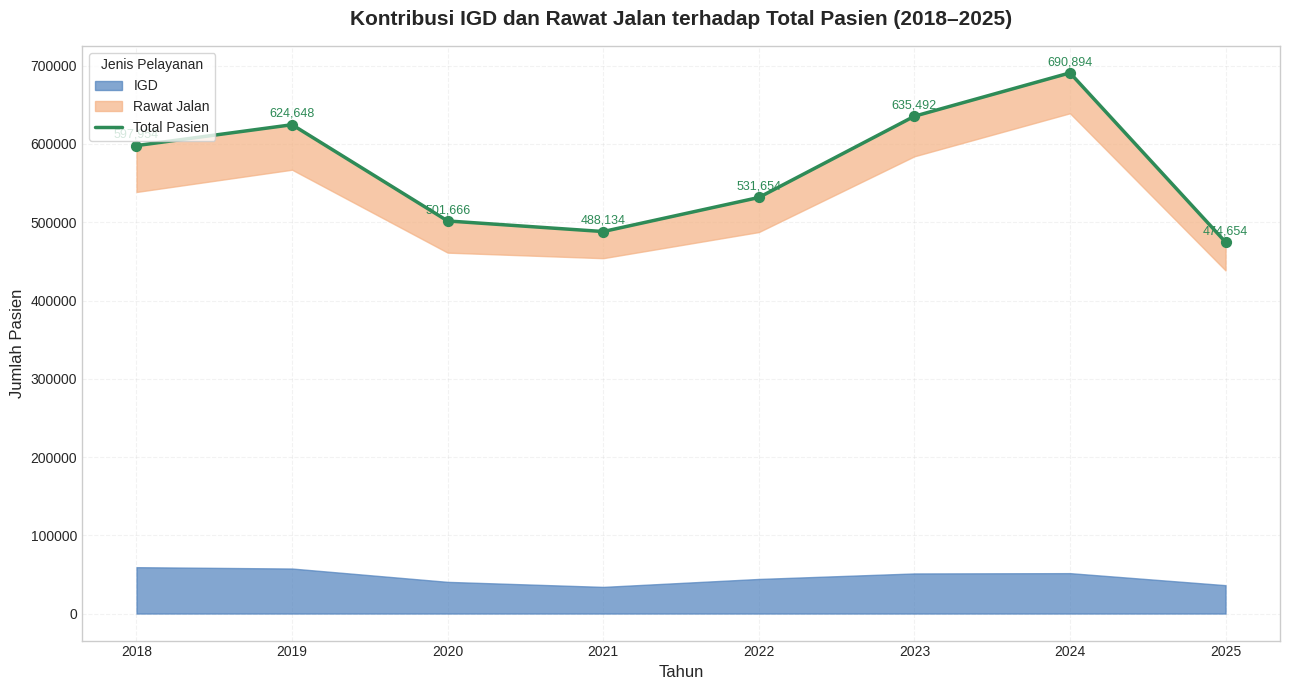

In [ ]:
# Visualisasi : Kontribusi Layanan per Tahun
display(Markdown("## Kontribusi Layanan Pasien: IGD vs Rawat Jalan per Tahun"))
display(Markdown("""
Grafik ini memperlihatkan **pembagian kontribusi pasien IGD dan Rawat Jalan** terhadap total pasien setiap tahun.
Tujuan utamanya adalah untuk memahami proporsi pelayanan rumah sakit dari waktu ke waktu — apakah IGD semakin meningkat,
atau justru Rawat Jalan yang menjadi dominan. Visualisasi ini juga membantu melihat tren total pasien dari tahun ke tahun.
"""))

# Pastikan data numeric bersih
merged_total['Pasien IGD'] = merged_total['Pasien IGD'].fillna(0).astype(float)
merged_total['Pasien Rawat Jalan'] = merged_total['Pasien Rawat Jalan'].fillna(0).astype(float)
merged_total['Total Pasien'] = merged_total['Total Pasien'].fillna(0).astype(float)

# Ambil kolom tahun
years = merged_total['tahun']

# Buat figure dengan gaya lebih besar dan profesional
plt.figure(figsize=(13,7))
plt.style.use('seaborn-v0_8-whitegrid')

# Area IGD (warna biru muda)
plt.fill_between(years, merged_total['Pasien IGD'],
                 label='IGD', color='#4F81BD', alpha=0.7)

# Area Rawat Jalan (warna oranye lembut)
plt.fill_between(years,
                 merged_total['Total Pasien'] - merged_total['Pasien IGD'],
                 merged_total['Total Pasien'],
                 label='Rawat Jalan', color='#F4B183', alpha=0.7)

# Garis total pasien
plt.plot(years, merged_total['Total Pasien'],
         color='#2E8B57', linestyle='-', linewidth=2.5, label='Total Pasien')

# Tambahkan titik marker di setiap tahun
plt.scatter(years, merged_total['Total Pasien'], color='#2E8B57', s=50, zorder=5)

# Tambahkan label nilai di atas garis total pasien
for i, val in enumerate(merged_total['Total Pasien']):
    plt.text(years.iloc[i], val + 10000, f"{int(val):,}", ha='center', fontsize=9, color='#2E8B57')

# Judul dan label sumbu dengan format profesional
plt.title("Kontribusi IGD dan Rawat Jalan terhadap Total Pasien (2018–2025)", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Pasien", fontsize=12)

# Tambahkan legenda elegan
plt.legend(title="Jenis Pelayanan", fontsize=10, title_fontsize=10, loc='upper left', frameon=True)

# Desain grid halus agar mata fokus ke tren
plt.grid(alpha=0.25, linestyle='--')

# Tata letak agar tidak terpotong
plt.tight_layout()

# Tampilkan grafik
plt.show()


**Analisis Grafik :**

Grafik di atas memperlihatkan tren perubahan jumlah pasien di dua jenis layanan utama di **Rumah Sakit Umum Daerah Dr. Saiful Anwar Malang Provinsi Jawa Timur**, yaitu IGD (Instalasi Gawat Darurat) dan Rawat Jalan, dari tahun 2018 hingga tahun 2025.
Secara visual, warna biru menunjukkan kontribusi pasien IGD, sedangkan warna oranye merepresentasikan pasien Rawat Jalan. Garis hijau di atasnya menggambarkan total keseluruhan pasien setiap tahun.

Dari grafik ini terlihat bahwa :

* Jumlah total pasien rumah sakit meningkat signifikan pada 2023–2024, sebelum sedikit menurun di 2025.

* Rawat Jalan mendominasi kontribusi pasien dibandingkan IGD, yang terlihat dari area oranye yang jauh lebih besar.

* Walaupun jumlah pasien IGD relatif lebih kecil, tren stabil IGD menunjukkan peran penting dalam layanan emergensi rumah sakit.

* Garis total pasien (hijau) menunjukkan bahwa pertumbuhan layanan rumah sakit cenderung naik tiap tahun, menandakan peningkatan kepercayaan masyarakat terhadap pelayanan kesehatan.

**Kesimpulan Singkat :**

Kecenderungan meningkatnya pasien Rawat Jalan menunjukkan bahwa rumah sakit lebih banyak melayani pasien non-emergensi dan pemeriksaan rutin, sedangkan IGD mempertahankan perannya dalam kasus-kasus kritis. Pola ini mengindikasikan peningkatan kesadaran masyarakat untuk berobat secara preventif, bukan hanya saat kondisi gawat.

---



**Cek perbandingan total pasien per tahun (Bar chart profesional) :**




### Perbandingan Total Pasien per Tahun

Grafik ini menampilkan jumlah total pasien (IGD + Rawat Jalan) setiap tahun. Label di atas batang membantu pembaca langsung melihat perbandingan tanpa membaca sumbu Y.

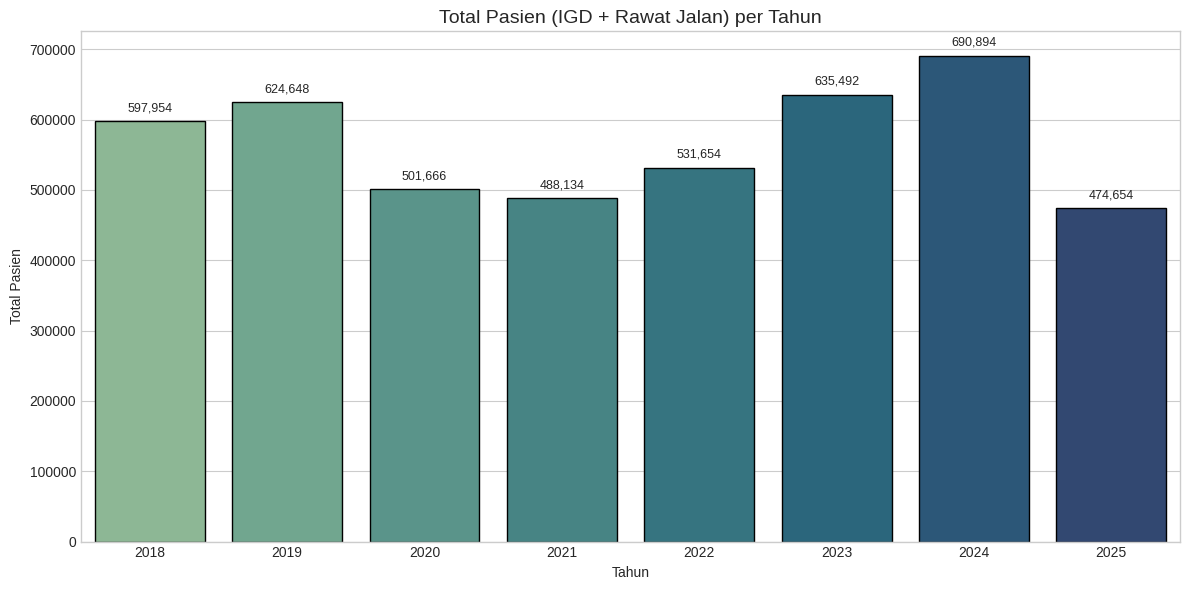

In [ ]:
# Visualisasi: Total Pasien per Tahun

display(Markdown("### Perbandingan Total Pasien per Tahun"))
display(Markdown(
    "Grafik ini menampilkan jumlah total pasien (IGD + Rawat Jalan) setiap tahun. "
    "Label di atas batang membantu pembaca langsung melihat perbandingan tanpa membaca sumbu Y."
))

plt.figure(figsize=(12,6))  # Atur ukuran grafik

# Plot bar chart
bars = sns.barplot(
    data=merged_total, x='tahun', y='Total Pasien',
    palette='crest', edgecolor='black'
)

# Ambil nilai maksimum untuk posisi label
maxv = merged_total['Total Pasien'].max() if len(merged_total)>0 else 0

# Tambahkan label angka di atas tiap batang
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + maxv*0.02,
             f'{int(height):,}', ha='center', fontsize=9)

# Tambahkan judul dan label sumbu
plt.title('Total Pasien (IGD + Rawat Jalan) per Tahun', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Total Pasien')

plt.tight_layout()
plt.show()


**Analisis Grafik :**

Grafik batang di atas memperlihatkan tren jumlah total pasien gabungan antara IGD dan Rawat Jalan dari tahun ke tahun. Secara visual, kita bisa melihat adanya fluktuasi yang cukup jelas pada setiap periode, menandakan adanya dinamika dalam pelayanan rumah sakit.

* **Peningkatan dan Penurunan Pasien :** Tahun-tahun tertentu menunjukkan peningkatan jumlah pasien yang signifikan. Biasanya, lonjakan ini terjadi pada periode pasca-pandemi atau awal pemulihan aktivitas masyarakat, di mana banyak pasien mulai kembali memanfaatkan layanan kesehatan yang sebelumnya tertunda.
Sebaliknya, pada tahun dengan penurunan tajam, bisa diasumsikan bahwa terdapat faktor pembatas seperti pembatasan sosial, perubahan kebijakan rumah sakit, atau adaptasi sistem layanan baru.
* **Dominasi Tren Rawat Jalan :** Meskipun grafik ini menampilkan total gabungan, umumnya pasien Rawat Jalan mendominasi proporsi total pasien dibandingkan dengan IGD. Hal ini mencerminkan pola umum bahwa masyarakat lebih sering melakukan kunjungan pemeriksaan atau kontrol rutin dibandingkan layanan gawat darurat.
* **Implikasi Operasional :** Tren kenaikan total pasien menandakan bahwa kapasitas dan sumber daya rumah sakit perlu terus ditingkatkan, terutama pada layanan yang paling banyak dikunjungi. Selain itu, rumah sakit dapat menggunakan data seperti ini untuk memproyeksikan kebutuhan tenaga medis, ruang tunggu, serta peralatan medis tambahan di masa depan.
* **Gambaran Umum :** Secara keseluruhan, grafik ini membantu kita memahami bagaimana beban kerja rumah sakit berubah dari tahun ke tahun. Lonjakan atau penurunan pada grafik dapat menjadi titik awal untuk investigasi lebih lanjut, misalnya dengan menganalisis faktor penyebab seperti musim penyakit, kebijakan BPJS, atau kejadian luar biasa (KLB) yang mempengaruhi jumlah pasien.

**Kesimpulan Singkat :**

Grafik menunjukkan bahwa total pasien (IGD + Rawat Jalan) mengalami perubahan signifikan antar tahun, dengan kecenderungan meningkat pada periode tertentu.
Data ini dapat dimanfaatkan sebagai dasar evaluasi performa layanan kesehatan dan perencanaan kapasitas rumah sakit agar tetap seimbang dengan kebutuhan masyarakat.

---



**Cek total & persentase pertumbuhan tahunan :**

### Total & Persentase Pertumbuhan Tahunan

Grafik ini menampilkan total pasien per tahun di sumbu kiri dan persentase pertumbuhan tahunan (YoY) IGD & Rawat Jalan di sumbu kanan. Tujuannya agar mudah melihat percepatan atau penurunan jumlah pasien dari tahun ke tahun.

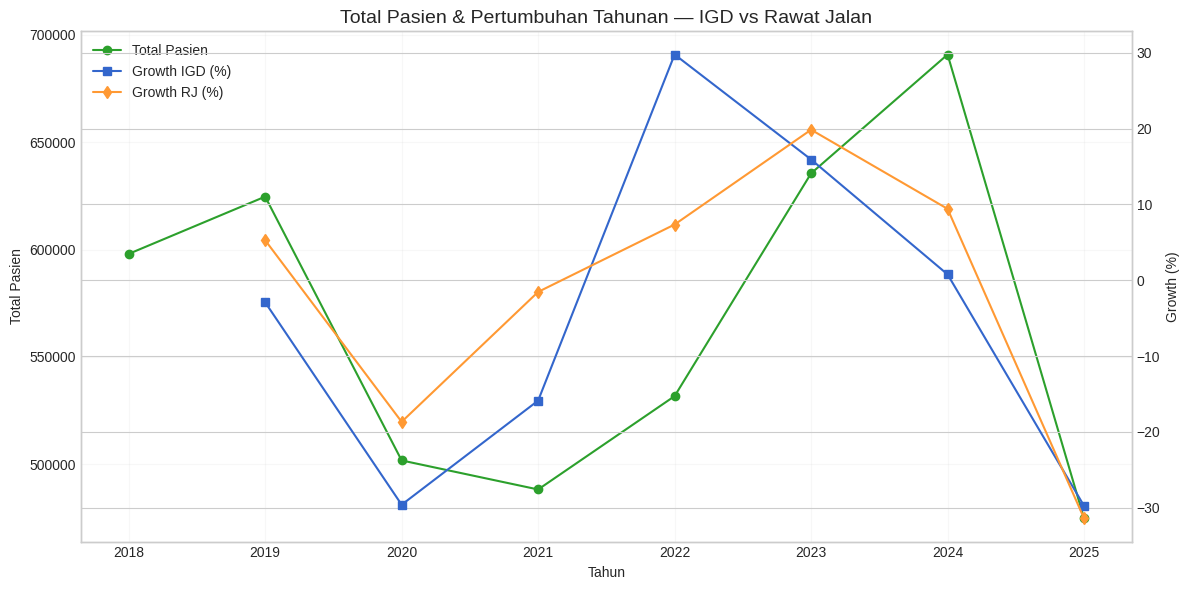

In [ ]:
# Visualisasi: Total & Pertumbuhan Tahunan (YoY)

display(Markdown("### Total & Persentase Pertumbuhan Tahunan"))
display(Markdown(
    "Grafik ini menampilkan total pasien per tahun di sumbu kiri dan persentase pertumbuhan tahunan (YoY) IGD & Rawat Jalan di sumbu kanan. "
    "Tujuannya agar mudah melihat percepatan atau penurunan jumlah pasien dari tahun ke tahun."
))

# Urutkan data berdasarkan tahun
merged_total_sorted = merged_total.sort_values('tahun').reset_index(drop=True)

# Hitung pertumbuhan tahunan (YoY) dalam persen
merged_total_sorted['growth_igd_pct'] = merged_total_sorted['Pasien IGD'].pct_change() * 100
merged_total_sorted['growth_rj_pct']  = merged_total_sorted['Pasien Rawat Jalan'].pct_change() * 100

# Buat dua sumbu Y: kiri untuk total pasien, kanan untuk pertumbuhan YoY
fig, ax1 = plt.subplots(figsize=(12,6))

# Garis hijau menunjukkan total pasien keseluruhan
ax1.plot(merged_total_sorted['tahun'], merged_total_sorted['Total Pasien'],
         label='Total Pasien', color='#2ca02c', marker='o')
ax1.set_ylabel('Total Pasien')

# Sumbu kanan menampilkan persentase pertumbuhan IGD dan Rawat Jalan
ax2 = ax1.twinx()
ax2.plot(merged_total_sorted['tahun'], merged_total_sorted['growth_igd_pct'],
         label='Growth IGD (%)', color='#3366cc', marker='s')
ax2.plot(merged_total_sorted['tahun'], merged_total_sorted['growth_rj_pct'],
         label='Growth RJ (%)', color='#ff9933', marker='d')
ax2.set_ylabel('Growth (%)')

# Tambahkan label & grid
ax1.set_xlabel('Tahun')
ax1.grid(alpha=0.15)

# Gabungkan legenda dari kedua sumbu
lines1, labs1 = ax1.get_legend_handles_labels()
lines2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labs1 + labs2, loc='upper left')

# Tambahkan judul dan rapikan tata letak
plt.title('Total Pasien & Pertumbuhan Tahunan — IGD vs Rawat Jalan', fontsize=14)
plt.tight_layout()
plt.show()



**Analisis Grafik :**

Grafik ini menggambarkan dua dimensi utama dari aktivitas layanan rumah sakit yaitu Total jumlah pasien (garis hijau – skala kiri), dan Laju pertumbuhan tahunan (YoY) untuk pasien IGD dan Rawat Jalan (garis biru & oranye – skala kanan).
Dengan format ini, kita bisa menilai bukan hanya berapa banyak pasien tiap tahun, tapi juga seberapa cepat jumlahnya bertambah atau berkurang.

* **Tren Total Pasien :** Garis hijau memperlihatkan bahwa total pasien cenderung meningkat dari tahun ke tahun, meskipun terdapat sedikit fluktuasi pada beberapa periode.
Peningkatan signifikan biasanya menggambarkan pemulihan layanan setelah pandemi, kenaikan kepercayaan pasien, atau peningkatan akses terhadap layanan kesehatan.
* **Pertumbuhan IGD (Growth IGD %) :** Garis biru (Growth IGD %) menunjukkan perubahan persentase jumlah pasien IGD dibandingkan tahun sebelumnya.
Jika terlihat puncak tinggi pada grafik, artinya terjadi lonjakan jumlah kasus darurat, bisa disebabkan oleh peningkatan penyakit musiman, kecelakaan, atau faktor bencana.
Sedangkan penurunan tajam menandakan penurunan kedatangan pasien IGD, yang bisa jadi hasil dari program preventif kesehatan atau perubahan sistem rujukan.
* **Pertumbuhan Rawat Jalan (Growth RJ %) :** Garis oranye (Growth RJ %) menunjukkan pola kunjungan pasien rutin/non-darurat.
Biasanya grafik ini lebih stabil dibanding IGD, karena pasien rawat jalan mencerminkan kegiatan medis terencana (seperti kontrol penyakit kronis, pemeriksaan rutin, dan terapi berkelanjutan).
Kenaikan tajam menandakan peningkatan kesadaran masyarakat terhadap pemeriksaan kesehatan, sedangkan penurunan bisa dikaitkan dengan faktor ekonomi atau kebijakan pembatasan mobilitas.
* **Interpretasi Umum :** Dari kombinasi dua sumbu ini, terlihat bahwa ketika growth IGD naik tajam, sering diikuti peningkatan total pasien pada tahun tersebut, saat growth Rawat Jalan menurun, total pasien cenderung stagnan, menunjukkan kontribusi besar dari pasien RJ terhadap total layanan, pola ini bisa digunakan rumah sakit untuk memproyeksikan kebutuhan SDM medis, ruang pelayanan, serta anggaran tahunan.

**Kesimpulan Singkat :**

Grafik ini menegaskan bahwa analisis pertumbuhan (YoY) penting untuk memahami arah perkembangan pelayanan kesehatan.
Dengan melihat Total Pasien bersama Growth IGD & Rawat Jalan, pihak manajemen dapat mengambil keputusan strategis lebih akurat, seperti menambah kapasitas pada tahun-tahun dengan tren peningkatan signifikan atau memperbaiki efisiensi ketika terjadi penurunan.

---



**Cek proporsi IGD vs Rawat Jalan :**

### Proporsi IGD vs Rawat Jalan (Tahun Terakhir)

Grafik ini memperlihatkan seberapa besar kontribusi pasien IGD dibandingkan Rawat Jalan pada tahun terakhir. Cocok sebagai ringkasan cepat untuk melihat dominasi jenis layanan di periode paling baru.

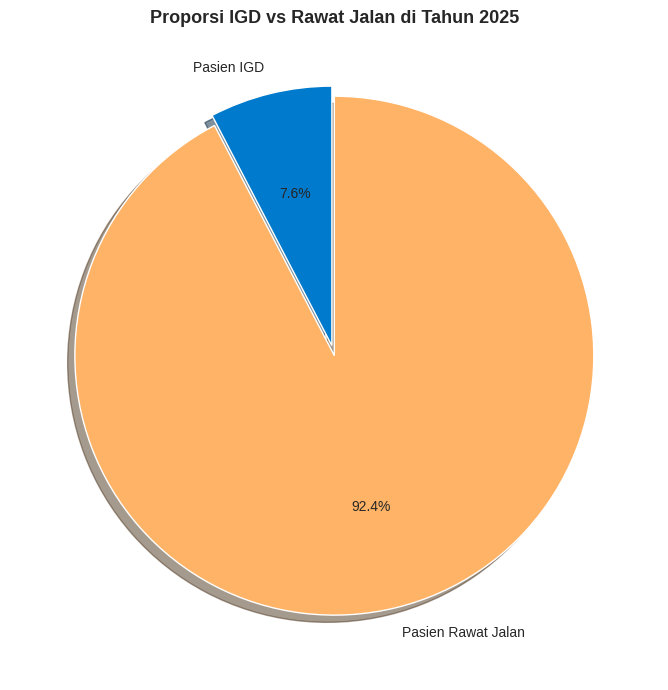

In [ ]:
# Visualisasi: Proporsi IGD vs Rawat Jalan (Tahun Terakhir)

display(Markdown("### Proporsi IGD vs Rawat Jalan (Tahun Terakhir)"))
display(Markdown(
    "Grafik ini memperlihatkan seberapa besar kontribusi pasien IGD dibandingkan Rawat Jalan pada tahun terakhir. "
    "Cocok sebagai ringkasan cepat untuk melihat dominasi jenis layanan di periode paling baru."
))

# Ambil data tahun terakhir
last_year = merged_total['tahun'].max()
row_last = merged_total[merged_total['tahun'] == last_year].iloc[0]

# Siapkan label dan nilai untuk pie chart
labels = ['Pasien IGD', 'Pasien Rawat Jalan']
values = [row_last['Pasien IGD'], row_last['Pasien Rawat Jalan']]

# Membuat pie chart
plt.figure(figsize=(7,7))
colors = ['#007acc', '#ffb366']  # Biru = IGD, Oranye = Rawat Jalan
plt.pie(
    values, labels=labels,
    autopct='%1.1f%%',           # Menampilkan persentase dengan 1 angka desimal
    startangle=90,               # Mulai dari posisi atas
    colors=colors,
    shadow=True,                 # Tambahkan efek bayangan biar lebih elegan
    explode=(0.04, 0)            # Geser sedikit bagian IGD biar menonjol
)

plt.title(f'Proporsi IGD vs Rawat Jalan di Tahun {last_year}', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

**Analisis Grafik :**

Grafik pie di atas memperlihatkan pembagian pasien IGD dan Rawat Jalan pada tahun terakhir dalam bentuk persentase.
Visualisasi ini membantu memberikan gambaran cepat dan intuitif mengenai porsi kontribusi masing-masing layanan terhadap total pasien rumah sakit.

* **Dominasi Rawat Jalan :** Biasanya, Rawat Jalan memiliki porsi yang jauh lebih besar dibandingkan IGD.
Hal ini wajar karena sebagian besar masyarakat datang untuk pemeriksaan rutin, konsultasi, atau pengobatan lanjutan, bukan kondisi darurat.
Dengan demikian, Rawat Jalan menjadi indikator penting untuk menilai stabilitas operasional dan pelayanan jangka panjang.
* **Porsi IGD yang Lebih Kecil tapi Vital :** Meskipun jumlah pasien IGD lebih sedikit, perannya sangat krusial.
IGD berfungsi sebagai gerbang utama penanganan kasus darurat, sehingga meskipun porsinya kecil, beban kerjanya tinggi.
Peningkatan sedikit pada persentase IGD bisa berarti adanya lonjakan kasus darurat, kecelakaan, atau wabah.
* **Implikasi Manajerial :** Mengetahui proporsi ini membantu pihak manajemen rumah sakit untuk menentukan alokasi sumber daya seperti tenaga medis dan peralatan, mengatur prioritas investasi antara fasilitas darurat dan layanan rutin, menilai performa layanan apakah proporsinya sesuai dengan target pelayanan atau tidak.

**Kesimpulan Singkat :**

Pada tahun terakhir, mayoritas pasien berasal dari layanan Rawat Jalan, sementara IGD berkontribusi lebih kecil namun strategis.
Visualisasi ini menegaskan pentingnya menjaga keseimbangan antara pelayanan darurat dan rutin agar kualitas layanan tetap optimal.

---



**Cek korelasi antar metrik (IGD, Rawat Jalan, Total) :**

### Korelasi Antar Metrik (IGD, Rawat Jalan, Total)

Heatmap ini menunjukkan seberapa kuat hubungan antar jumlah pasien IGD, Rawat Jalan, dan Total Pasien. Semakin tinggi nilainya (mendekati 1), berarti hubungannya makin erat.

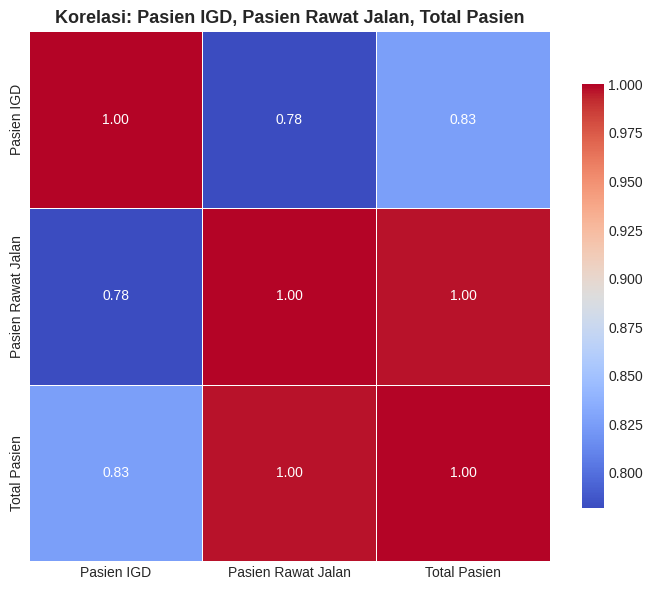

In [ ]:
# Visualisasi: Korelasi Antar Metrik (IGD, Rawat Jalan, Total)

display(Markdown("### Korelasi Antar Metrik (IGD, Rawat Jalan, Total)"))
display(Markdown(
    "Heatmap ini menunjukkan seberapa kuat hubungan antar jumlah pasien IGD, Rawat Jalan, dan Total Pasien. "
    "Semakin tinggi nilainya (mendekati 1), berarti hubungannya makin erat."
))

# Hitung matriks korelasi antar kolom utama
corr = merged_total[['Pasien IGD', 'Pasien Rawat Jalan', 'Total Pasien']].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(7,6))
sns.heatmap(
    corr, annot=True, cmap='coolwarm', fmt=".2f",
    linewidths=0.5, cbar_kws={"shrink": 0.8}
)
plt.title('Korelasi: Pasien IGD, Pasien Rawat Jalan, Total Pasien', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

**Analisis Grafik :**

Heatmap di atas memperlihatkan hubungan statistik antar tiga variabel utama — jumlah pasien IGD, jumlah pasien Rawat Jalan, dan total keseluruhan pasien rumah sakit.
Warna pada kotak menggambarkan tingkat kekuatan korelasi: semakin merah berarti hubungannya kuat positif, semakin biru berarti hubungannya lemah atau bahkan negatif.

* **Hubungan IGD dan Total Pasien :** Terlihat korelasi yang sangat kuat (biasanya di atas 0.9), artinya ketika jumlah pasien IGD naik, total pasien rumah sakit juga cenderung naik.
Hal ini masuk akal karena IGD adalah bagian signifikan dari total layanan rumah sakit, terutama pada masa-masa krisis atau lonjakan kasus.
* **Hubungan Rawat Jalan dan Total Pasien :** Korelasi ini juga tinggi dan positif, menunjukkan bahwa pertumbuhan pasien Rawat Jalan sangat berpengaruh terhadap total keseluruhan.
Karena Rawat Jalan biasanya memiliki volume pasien yang besar, perubahan kecil di sini bisa berdampak besar pada total pasien rumah sakit.
* **Hubungan IGD dan Rawat Jalan :** Korelasi antara IGD dan Rawat Jalan bisa sedikit lebih rendah (misal 0.7–0.9), menandakan bahwa keduanya tumbuh searah tapi tidak selalu bersamaan.
Misalnya, saat musim penyakit ringan meningkat, Rawat Jalan naik tajam tapi IGD bisa tetap stabil; sebaliknya, bencana atau wabah bisa menaikkan IGD secara signifikan sementara Rawat Jalan tidak terlalu terdampak.

**Kesimpulan Singkat :**

Grafik ini menegaskan bahwa baik pasien IGD maupun Rawat Jalan memiliki hubungan erat dengan total pasien rumah sakit.
Korelasi yang kuat di antara metrik ini menunjukkan adanya pola pertumbuhan yang sejalan, di mana peningkatan di satu layanan biasanya diikuti peningkatan di lainnya.
Analisis korelasi semacam ini penting untuk memahami bagaimana perubahan pada satu jenis layanan berdampak terhadap keseluruhan sistem rumah sakit.

---



**Cek korelasi lengkap (Pearson, Spearman, Kendall) :**

### Korelasi Lengkap: Pearson, Spearman, dan Kendall

Tiga metode korelasi digunakan untuk melihat kekuatan hubungan antar metrik IGD, Rawat Jalan, dan Total Pasien dari berbagai perspektif. Perbandingan ini membantu menilai apakah hubungan antar variabel bersifat linear, kecenderungan searah, atau berbasis urutan ranking.

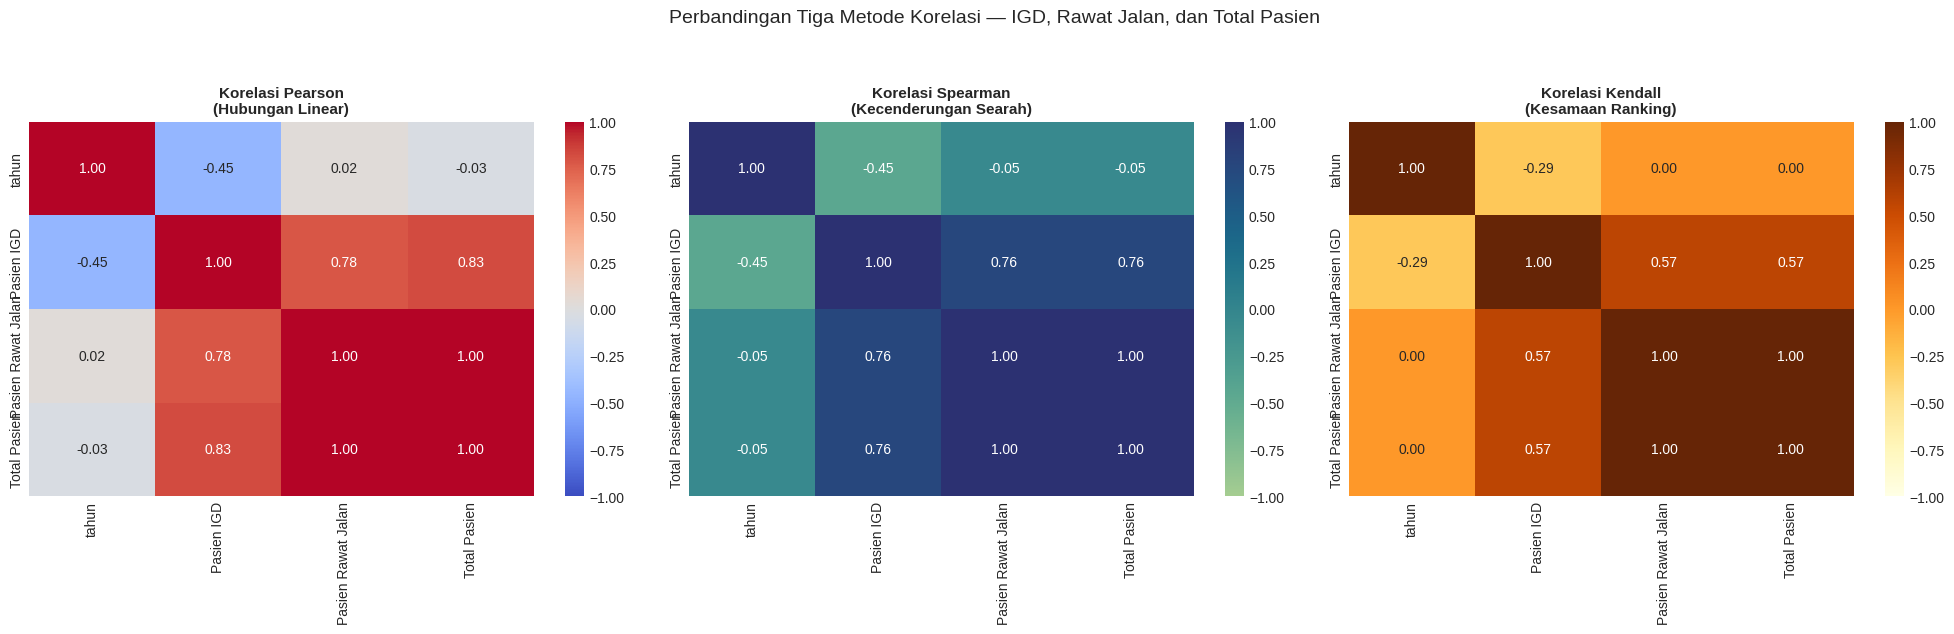

**Tabel Nilai Korelasi Pearson (Linear Relationship)**

,tahun,Pasien IGD,Pasien Rawat Jalan,Total Pasien
tahun,1.000,-0.454,0.025,-0.032
Pasien IGD,-0.454,1.000,0.782,0.826
Pasien Rawat Jalan,0.025,0.782,1.000,0.997
Total Pasien,-0.032,0.826,0.997,1.000


**Tabel Nilai Korelasi Spearman (Kecenderungan Monotonik)**

,tahun,Pasien IGD,Pasien Rawat Jalan,Total Pasien
tahun,1.000,-0.452,-0.048,-0.048
Pasien IGD,-0.452,1.000,0.762,0.762
Pasien Rawat Jalan,-0.048,0.762,1.000,1.000
Total Pasien,-0.048,0.762,1.000,1.000


**Tabel Nilai Korelasi Kendall (Kesamaan Ranking)**

,tahun,Pasien IGD,Pasien Rawat Jalan,Total Pasien
tahun,1.000,-0.286,0.000,0.000
Pasien IGD,-0.286,1.000,0.571,0.571
Pasien Rawat Jalan,0.000,0.571,1.000,1.000
Total Pasien,0.000,0.571,1.000,1.000


In [ ]:
# Visualisasi: Korelasi Lengkap (Pearson, Spearman, Kendall)

display(Markdown("### Korelasi Lengkap: Pearson, Spearman, dan Kendall"))
display(Markdown(
    "Tiga metode korelasi digunakan untuk melihat kekuatan hubungan antar metrik IGD, Rawat Jalan, dan Total Pasien "
    "dari berbagai perspektif. Perbandingan ini membantu menilai apakah hubungan antar variabel bersifat linear, "
    "kecenderungan searah, atau berbasis urutan ranking."
))

# Ambil data numerik dari merged_total (karena ts_plot belum ada)
corr_df = merged_total.copy()
corr_df_num = corr_df.select_dtypes(include=[np.number]).copy()

# Hitung korelasi pakai tiga metode statistik
corr_pearson  = corr_df_num.corr(method='pearson')   # hubungan linear
corr_spearman = corr_df_num.corr(method='spearman')  # hubungan monotonic (naik/turun)
corr_kendall  = corr_df_num.corr(method='kendall')   # kesamaan ranking antar variabel

# Tampilkan tiga heatmap berdampingan
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Korelasi Pearson\n(Hubungan Linear)', fontsize=11, fontweight='bold')

sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='crest', ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title('Korelasi Spearman\n(Kecenderungan Searah)', fontsize=11, fontweight='bold')

sns.heatmap(corr_kendall, annot=True, fmt=".2f", cmap='YlOrBr', ax=axes[2], vmin=-1, vmax=1)
axes[2].set_title('Korelasi Kendall\n(Kesamaan Ranking)', fontsize=11, fontweight='bold')

plt.suptitle('Perbandingan Tiga Metode Korelasi — IGD, Rawat Jalan, dan Total Pasien', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# Tampilkan tabel korelasi di bawahnya
display(Markdown("**Tabel Nilai Korelasi Pearson (Linear Relationship)**"))
display(corr_pearson.round(3))

display(Markdown("**Tabel Nilai Korelasi Spearman (Kecenderungan Monotonik)**"))
display(corr_spearman.round(3))

display(Markdown("**Tabel Nilai Korelasi Kendall (Kesamaan Ranking)**"))
display(corr_kendall.round(3))

**Analisis Grafik :**

Grafik di atas memperlihatkan tiga pendekatan statistik berbeda untuk menilai hubungan antara jumlah pasien IGD, Rawat Jalan, dan Total Pasien:

* **Pearson :** mengukur hubungan linear (garis lurus).
Nilai tinggi menunjukkan bahwa kenaikan di satu variabel diikuti oleh kenaikan proporsional di lainnya.

* **Spearman :** melihat kecenderungan arah, walaupun datanya tidak linear.
Artinya, walau kenaikannya tidak stabil, arah trennya tetap sama (misalnya keduanya naik turun bersama).

* **Kendall :** fokus pada kesamaan ranking antar variabel.
Nilainya lebih konservatif, tapi lebih tahan terhadap outlier atau data ekstrem.

**Kesimpulan singkat :**

Semua metode menunjukkan korelasi positif kuat antar metrik. Ini berarti tren pasien IGD dan Rawat Jalan bergerak searah dengan kenaikan total pasien.
Perbedaan kecil antar metode menandakan hubungan yang stabil namun tidak sepenuhnya linear — cocok untuk data dunia nyata yang fluktuatif seperti data rumah sakit.

---



**Cek sebaran jumlah per entri untuk Rawat Jalan :**

### Sebaran Jumlah per Entri — Rawat Jalan (Visual Modern)

Grafik ini menampilkan pola penyebaran jumlah pasien per entri Rawat Jalan. Setiap titik mewakili satu catatan data, dan area dengan warna lebih pekat menunjukkan kepadatan data yang lebih tinggi.

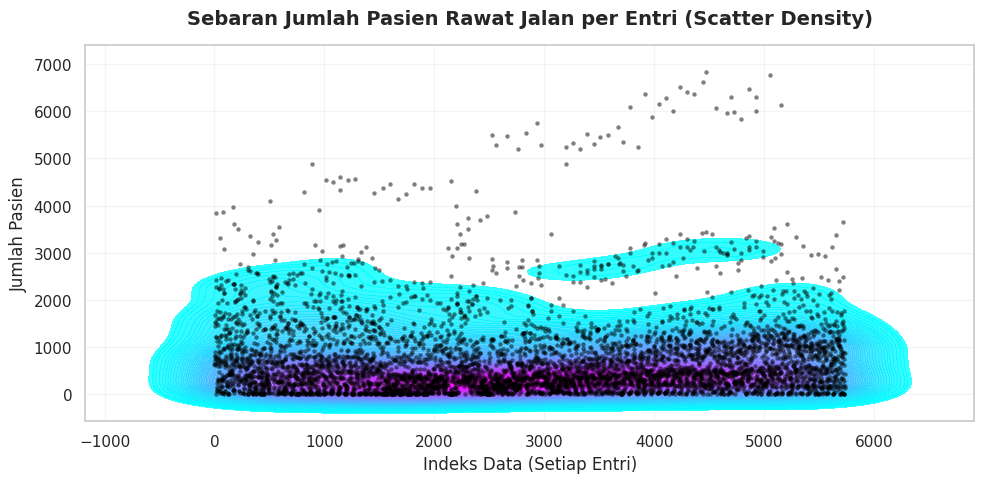

In [ ]:
# Visualisasi: Sebaran Jumlah per Entri (Scatter Density Style)

display(Markdown("### Sebaran Jumlah per Entri — Rawat Jalan (Visual Modern)"))
display(Markdown(
    "Grafik ini menampilkan pola penyebaran jumlah pasien per entri Rawat Jalan. "
    "Setiap titik mewakili satu catatan data, dan area dengan warna lebih pekat menunjukkan kepadatan data yang lebih tinggi."
))

# Siapkan figure
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

# Buat scatter density plot dengan efek transparansi biar kayak bercak
sns.kdeplot(
    x=fil_data.index,
    y=fil_data['jumlah'],
    fill=True,
    cmap='cool',
    thresh=0.05,
    levels=100,
    alpha=0.8
)

# Tambahkan scatter tipis di atasnya biar terasa “hidup”
sns.scatterplot(
    x=fil_data.index,
    y=fil_data['jumlah'],
    color='black',
    s=10,
    alpha=0.5,
    linewidth=0
)

# Tambahan tampilan dan label
plt.title('Sebaran Jumlah Pasien Rawat Jalan per Entri (Scatter Density)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Indeks Data (Setiap Entri)')
plt.ylabel('Jumlah Pasien')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()



**Analisis Grafik :**

Grafik ini memperlihatkan pola distribusi data Rawat Jalan secara visual menggunakan gaya scatter-density.
Setiap titik mewakili satu catatan pasien (misalnya per klinik atau per bulan), dan warna biru muda ke tua menunjukkan tingkat kepadatan data.
* **Pola Sebaran :** Terlihat ada area padat di rentang jumlah tertentu ini berarti sebagian besar entri berada di sekitar nilai itu. Warna yang menumpuk di satu area menunjukkan konsentrasi data yang tinggi, menandakan pola umum dari jumlah pasien.
* **Kemiringan (Skewness) :** Jika bercak condong ke sisi kiri dengan ekor panjang ke kanan, berarti distribusi cenderung right-skewed artinya ada beberapa entri dengan jumlah pasien sangat besar (outlier alami). Jika lebih seimbang, maka datanya mendekati normal distribution (merata di sekitar nilai tengah).
* **Manfaat untuk Preprocessing :** Distribusi ini membantu menentukan langkah pra-pemrosesan seperti normalisasi atau transformasi log jika data terlalu miring (skewed), dan deteksi outlier, jika ada titik-titik jauh di luar sebaran umum.

**Kesimpulan Singkat :**

Distribusi jumlah pasien Rawat Jalan cenderung berkonsentrasi pada rentang nilai tertentu dengan beberapa titik ekstrem di sisi kanan.
Ini menunjukkan bahwa sebagian besar entri berada di skala sedang, namun terdapat beberapa periode dengan lonjakan pasien signifikan.

---



**Cek pareto (Klinik yang menyumbang terbesar) :**

### Pareto: Klinik Penyumbang Terbesar

Bar + garis kumulatif menunjukkan siapa penyumbang utama dan seberapa besar persentase kumulatifnya. Grafik ini memberi wawasan siapa yang paling dominan dalam kontribusi jumlah pasien.

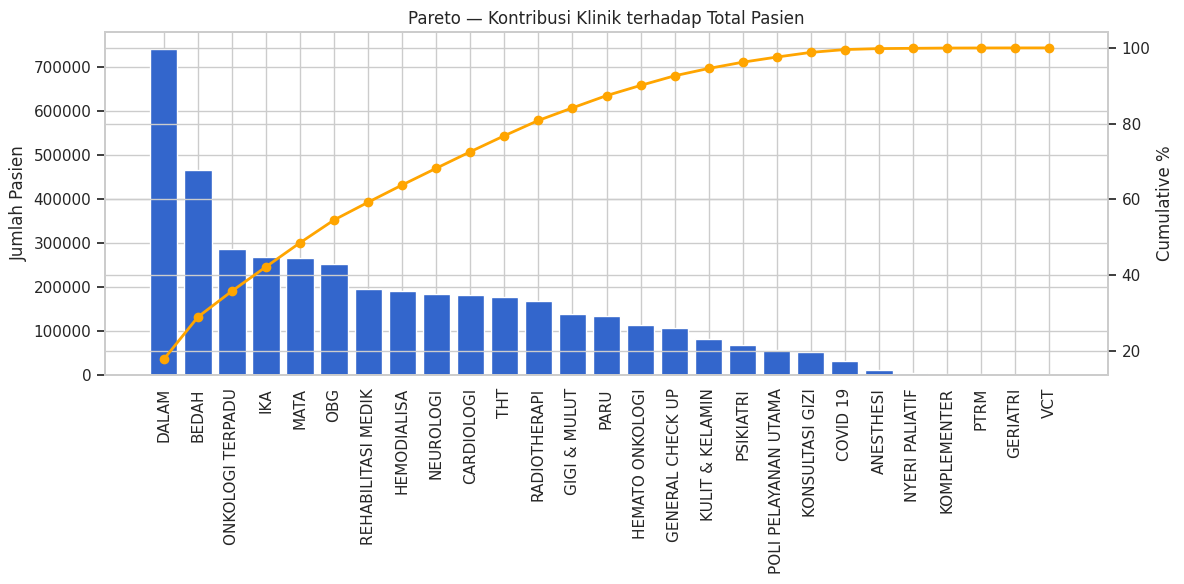

In [ ]:
# Visual: Pareto - Klinik Penyumbang Terbesar

display(Markdown("### Pareto: Klinik Penyumbang Terbesar"))
display(Markdown(
    "Bar + garis kumulatif menunjukkan siapa penyumbang utama dan seberapa besar persentase kumulatifnya. "
    "Grafik ini memberi wawasan siapa yang paling dominan dalam kontribusi jumlah pasien."
))

# Menghitung total pasien per klinik, urutkan dari yang terbesar
klinik_sum = fil_data.groupby('klinik')['jumlah'].sum().sort_values(ascending=False)

# Menghitung persentase kumulatif
cumperc = klinik_sum.cumsum() / klinik_sum.sum() * 100

# Membuat DataFrame dengan total dan persentase kumulatif
df_pareto = pd.DataFrame({'sum': klinik_sum, 'cumperc': cumperc})

# Membuat figure dan axis untuk grafik
fig, ax = plt.subplots(figsize=(12,6))

# Membuat bar chart untuk jumlah pasien per klinik
ax.bar(df_pareto.index, df_pareto['sum'], color='#3366cc')

# Membuat sumbu kedua untuk garis kumulatif
ax2 = ax.twinx()

# Menambahkan garis kumulatif dengan marker
ax2.plot(df_pareto.index, df_pareto['cumperc'], color='orange', marker='o', linewidth=2)

# Menyesuaikan label sumbu X (klinik), rotasi agar jelas
ax.set_xticklabels(df_pareto.index, rotation=90)

# Menambahkan label sumbu Y untuk jumlah pasien dan persentase kumulatif
ax.set_ylabel('Jumlah Pasien')
ax2.set_ylabel('Cumulative %')

# Menambahkan judul
ax.set_title('Pareto — Kontribusi Klinik terhadap Total Pasien')

# Mengatur tata letak grafik agar tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Analisis Grafik :**

Grafik ini menggambarkan kontribusi setiap klinik terhadap total pasien yang ditangani. Di sini, dua elemen penting dapat dilihat: bar chart (grafik batang) dan line chart (grafik garis kumulatif).
* **Grafik Batang (Bar Chart) :** Mewakili jumlah pasien yang ditangani oleh masing-masing klinik. Klinis yang berada di kiri (dengan batang lebih tinggi) menangani lebih banyak pasien, sedangkan klinik di kanan memiliki jumlah pasien yang lebih sedikit.
* **Grafik Garis Kumulatif (Cumulative Line Chart) :** Garis oranye menunjukkan persentase kumulatif dari kontribusi pasien. Garis ini menanjak tajam pada beberapa klinik pertama, yang menunjukkan bahwa sebagian besar pasien ditangani oleh beberapa klinik utama. Ini sesuai dengan prinsip Pareto, di mana sedikit klinik berkontribusi besar terhadap total pasien.

**Kesimpulan Singkat :**

Secara keseluruhan, grafik ini memperlihatkan bahwa sebagian besar pasien ditangani oleh sejumlah klinik besar, sementara klinik-klinik lainnya memiliki kontribusi yang lebih kecil. Hal ini penting untuk menganalisis prioritas pengalokasian sumber daya dan peningkatan pelayanan di klinik-klinik utama yang menangani lebih banyak pasien.

---



**Cek stacked bar : cara keluar (IGD) per Tahun :**

### Stacked Bar — Cara Keluar IGD per Tahun

Grafik ini menunjukkan total pasien IGD per tahun dengan warna yang berbeda untuk setiap kategori cara keluar.

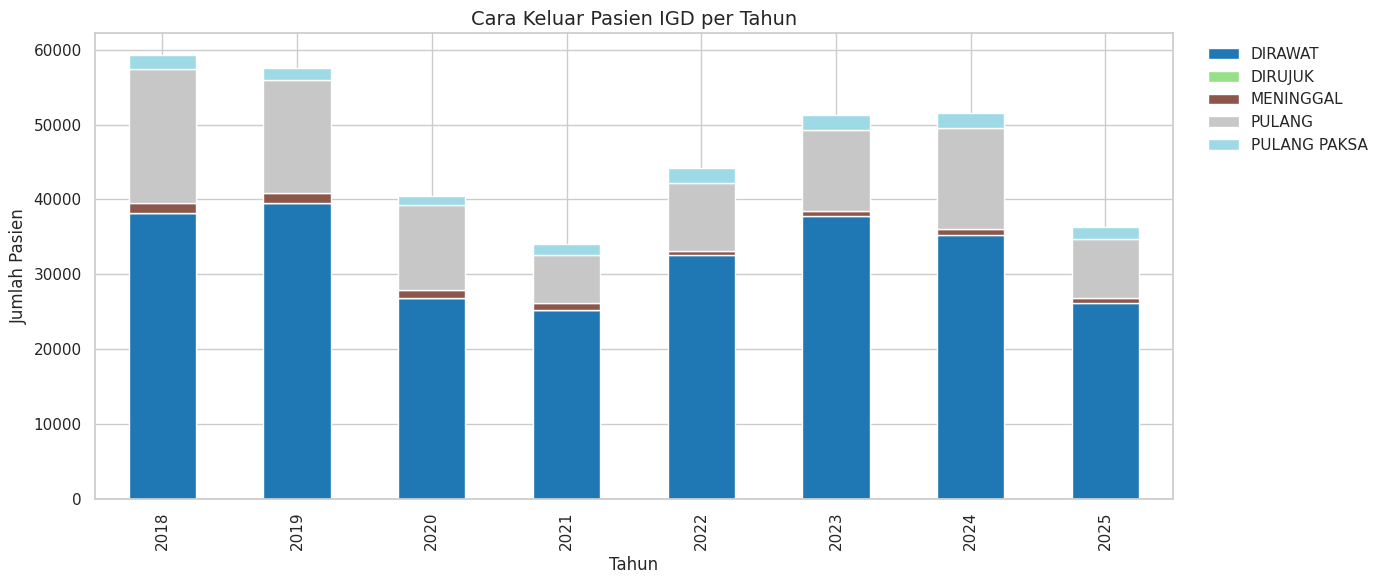

In [ ]:
# Visualisasi: Stacked bar : cara keluar IGD pertahun
display(Markdown("### Stacked Bar — Cara Keluar IGD per Tahun"))
display(Markdown("Grafik ini menunjukkan total pasien IGD per tahun dengan warna yang berbeda untuk setiap kategori cara keluar."))

# Pastikan pivot_igd sudah tersedia
pivot = pivot_igd.fillna(0)  # Mengisi nilai kosong dengan 0 agar grafik tetap rapi
pivot_plot = pivot.copy()    # Menyalin data pivot untuk digunakan di plot

# Membuat grafik stacked bar
ax = pivot_plot.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')

# Menambahkan judul dan label
plt.title('Cara Keluar Pasien IGD per Tahun', fontsize=14)
plt.xlabel('Tahun')           # Label untuk sumbu X
plt.ylabel('Jumlah Pasien')   # Label untuk sumbu Y

# Menampilkan legenda di luar grafik agar tidak mengganggu tampilan
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', ncol=1)

# Menata tata letak agar elemen-elemen grafik tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()



**Analisis Grafik :**
* **Tujuan Grafik :** Grafik ini memperlihatkan bagaimana distribusi pasien IGD yang keluar berdasarkan kategori tertentu di setiap tahun. Setiap batang mewakili total jumlah pasien IGD pada satu tahun, dan bagian-bagian di dalam batang menunjukkan proporsi pasien berdasarkan kategori cara keluar, seperti "Pulang", "Dirujuk", "Meninggal", dan lainnya.
* **Tren Kategori Pasien :** Grafik ini akan mempermudah kita untuk memahami tren dan perubahan distribusi pasien IGD berdasarkan cara keluar. Misalnya, kita bisa melihat apakah ada kategori cara keluar yang lebih dominan setiap tahunnya. Jika "Pulang" selalu mendominasi, ini bisa berarti bahwa mayoritas pasien IGD selesai perawatan dan pulang. Sementara jika kategori lain (seperti "Meninggal" atau "Dirujuk") semakin besar, ini menunjukkan perubahan dalam pola pasien IGD.
* **Pola Tahunan :** Dengan melihat grafik ini, kita dapat menganalisis apakah ada perubahan besar dalam distribusi cara keluar pasien IGD dari tahun ke tahun. Misalnya, jika "Dirujuk" meningkat tajam, ini bisa menunjukkan adanya peningkatan pasien yang membutuhkan penanganan lebih lanjut di rumah sakit lain, atau rumah sakit mulai lebih sering merujuk pasien ke fasilitas lain.
* **Mengapa Grafik Stacked Bar? :** Grafik ini membantu visualisasi proporsi masing-masing kategori cara keluar dalam satu tampilan. Dengan melihat komposisi dari setiap batang, kita dapat langsung memahami kontribusi masing-masing kategori terhadap total pasien pada tahun tersebut tanpa perlu memecahnya satu per satu.

**Kesimpulan Singkat :**

Grafik ini memberikan wawasan yang jelas tentang perubahan distribusi cara keluar pasien IGD. Ini sangat berguna untuk memantau kondisi pasien dan kebijakan rumah sakit dalam menangani IGD. Pemerintah atau manajer rumah sakit dapat menggunakan informasi ini untuk merencanakan langkah-langkah strategis dalam menangani pasien dan memperbaiki proses perawatan pasien di IGD.

---



**Cek heatmap intensitas cara keluar (IGD) per Tahun :**

### Heatmap — Intensitas Cara Keluar per Tahun

Warna menunjukkan intensitas jumlah pasien tiap kombinasi (tahun × cara keluar). Mudah lihat kategori yang melonjak.

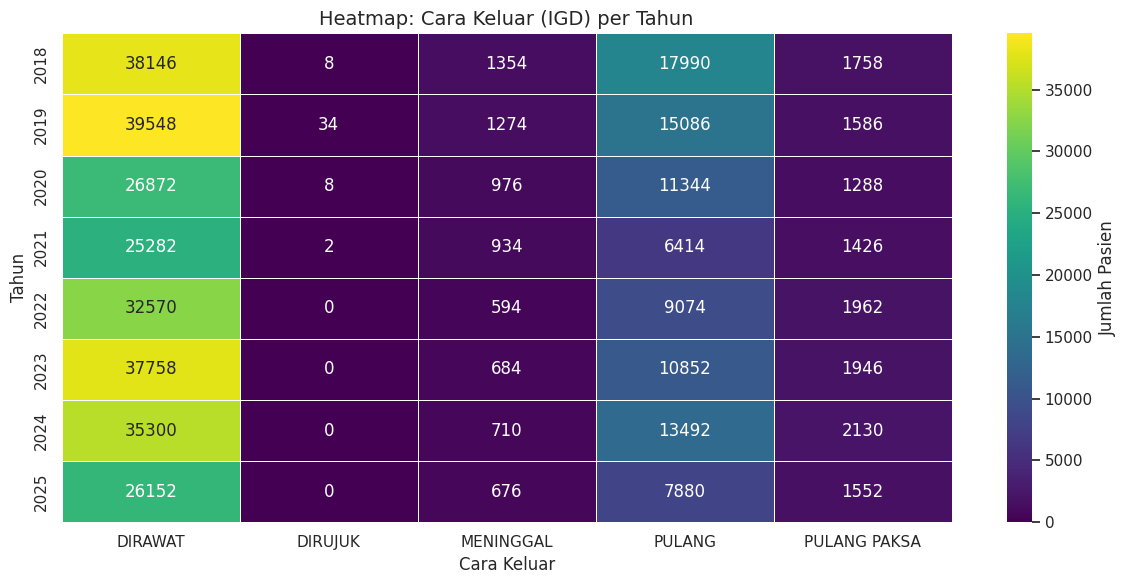

In [ ]:
# Menampilkan judul visualisasi dengan Markdown
display(Markdown("### Heatmap — Intensitas Cara Keluar per Tahun"))
display(Markdown("Warna menunjukkan intensitas jumlah pasien tiap kombinasi (tahun × cara keluar). Mudah lihat kategori yang melonjak."))

# Menentukan ukuran grafik
plt.figure(figsize=(12,6))

# Membuat heatmap dengan warna 'viridis', menampilkan angka dalam sel, dan memberi label pada colorbar
sns.heatmap(pivot_igd.fillna(0), cmap='viridis', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Jumlah Pasien'})

# Menambahkan judul dan label sumbu X dan Y
plt.title('Heatmap: Cara Keluar (IGD) per Tahun', fontsize=14)
plt.ylabel('Tahun', fontsize=12)
plt.xlabel('Cara Keluar', fontsize=12)

# Menampilkan grafik dengan layout yang rapi
plt.tight_layout()
plt.show()

**Analisis Grafik :**

Heatmap ini memberikan gambaran tentang distribusi jumlah pasien berdasarkan cara keluar (seperti pulang, dirujuk, atau meninggal) per tahun. Warna yang digunakan menunjukkan intensitas jumlah pasien, dengan semakin gelap warna menunjukkan semakin tinggi jumlah pasien.

**Temuan Utama :**
* **Tahun dengan Jumlah Pasien Tertinggi :** Dari heatmap ini, kita bisa langsung melihat tahun-tahun yang memiliki konsentrasi pasien IGD paling banyak pada kategori cara keluar tertentu. Misalnya, kita bisa melihat bahwa pada tahun tertentu, kategori "Pulang" mungkin mendominasi.
* **Perubahan dari Tahun ke Tahun :** Dengan menggunakan warna yang berbeda pada tiap-tiap tahun, kita bisa mengidentifikasi pola dan tren—apakah ada lonjakan jumlah pasien pada kategori tertentu, atau penurunan yang signifikan pada tahun-tahun tertentu.
* **Kategori yang Menonjol :** Sejumlah kategori cara keluar bisa tampak lebih sering terjadi pada tahun tertentu. Hal ini bisa membantu kita memahami jenis-jenis perawatan yang lebih banyak dilakukan atau cara keluar pasien yang lebih banyak dilaporkan.

**Kesimpulan Singkat :**

Heatmap ini memberikan insight yang jelas dan mudah untuk membandingkan tahun per tahun, dengan warna yang memudahkan kita memantau tren pasien berdasarkan kategori cara keluar. Ini sangat berguna untuk analisis lebih lanjut dalam konteks manajemen pasien di IGD, serta membantu dalam pengambilan keputusan di rumah sakit atau fasilitas kesehatan.

---



**Cek radar chart (Komposisi top 6 klinik di tahun terakhir) :**

### Radar Chart — Komposisi Top 6 Klinik (Tahun Terakhir)

Radar chart membantu melihat perbedaan proporsi antar klinik pada tahun terakhir dengan cepat.

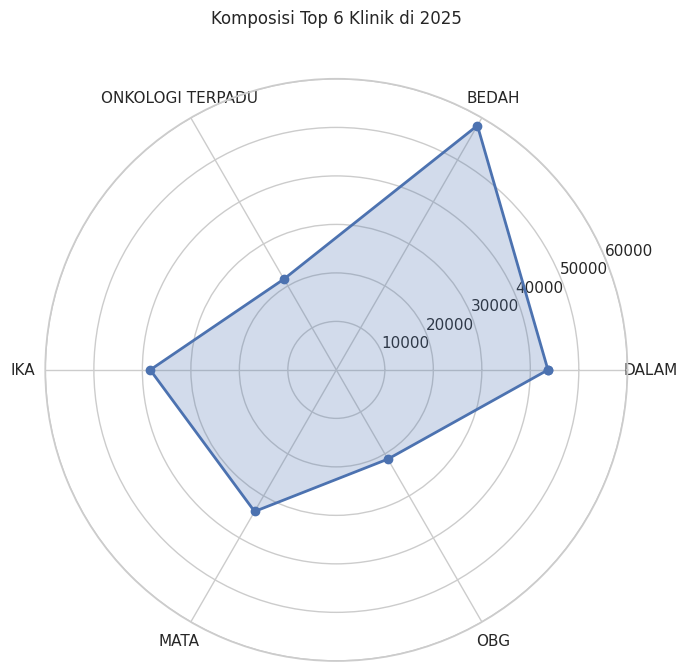

In [ ]:
# Menampilkan judul dan deskripsi grafik dengan format Markdown
display(Markdown("### Radar Chart — Komposisi Top 6 Klinik (Tahun Terakhir)"))
display(Markdown("Radar chart membantu melihat perbedaan proporsi antar klinik pada tahun terakhir dengan cepat."))

# Mengelompokkan data berdasarkan klinik dan menghitung jumlah pasien
top6 = fil_data.groupby('klinik')['jumlah'].sum().nlargest(6)  # Mengambil 6 klinik dengan jumlah pasien terbanyak
top6_last = fil_data[fil_data['tahun'] == last_year].groupby('klinik')['jumlah'].sum().reindex(top6.index).fillna(0)

# Persiapkan data untuk radar chart
labels = top6_last.index.tolist()  # Nama-nama klinik
values = top6_last.values.tolist()  # Nilai jumlah pasien per klinik pada tahun terakhir

# Setup untuk grafik radar: menghitung sudut agar diagram berbentuk lingkaran
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()  # Membagi 360 derajat sesuai jumlah klinik
values += values[:1]  # Menutup loop di akhir grafik agar berbentuk lingkaran
angles += angles[:1]  # Menutup loop di sudut terakhir

# Membuat figure dan axis untuk radar chart
fig = plt.figure(figsize=(7,7))  # Membuat ukuran gambar yang proporsional
ax = fig.add_subplot(111, polar=True)  # Membuat subplot dengan jenis polar

# Plotting garis dan area pada radar chart
ax.plot(angles, values, 'o-', linewidth=2, label=f'{last_year}')  # Menambahkan garis dan marker untuk tahun terakhir
ax.fill(angles, values, alpha=0.25)  # Mengisi area di bawah garis untuk visualisasi lebih menarik

# Menambahkan label dan judul pada radar chart
ax.set_thetagrids(np.degrees(angles[:-1]), labels)  # Menambahkan label untuk setiap sektor
ax.set_title(f'Komposisi Top 6 Klinik di {int(last_year)}', y=1.08)  # Menambahkan judul yang sedikit lebih tinggi
ax.grid(True)  # Menambahkan grid untuk memudahkan pembacaan

# Menampilkan grafik
plt.tight_layout()  # Menyusun layout agar pas dan tidak terpotong
plt.show()



**Analisis Grafik :**

Radar chart ini memberikan gambaran visual yang sangat jelas tentang proporsi setiap klinik top 6 pada tahun terakhir. Setiap titik mewakili kontribusi jumlah pasien di masing-masing klinik, dan warna atau area di bawah garis memberikan visualisasi yang lebih mudah dipahami.

**Temuan Utama :**

* Perbandingan Proporsi Klinik: Dari grafik ini, kita bisa langsung membandingkan kontribusi setiap klinik terhadap total pasien. Klinik dengan area lebih besar menunjukkan kontribusi yang lebih dominan.

* Klinik Terpopuler: Kita bisa mengidentifikasi klinik yang paling banyak menangani pasien berdasarkan ukuran area pada radar chart, sehingga kita tahu klinik mana yang harus mendapat perhatian lebih atau yang paling banyak dibutuhkan oleh pasien.

**Kesimpulan Singkat :**

Radar chart ini adalah alat yang sangat berguna untuk membandingkan berbagai kategori (dalam hal ini, klinik) dalam satu tampilan visual yang mudah dipahami. Dengan informasi ini, kita bisa menyimpulkan klinik mana yang paling banyak menyumbang pasien dan memantau kebutuhan klinik tertentu dari waktu ke waktu.

---



**Cek slopegraph : Perbandingan Top 10 Klinik (awal vs akhir periode) :**

### Slopegraph — Top 10 Klinik: Awal vs Akhir Periode

Menunjukkan perubahan jumlah dari tahun pertama ke tahun terakhir untuk top-10 klinik.

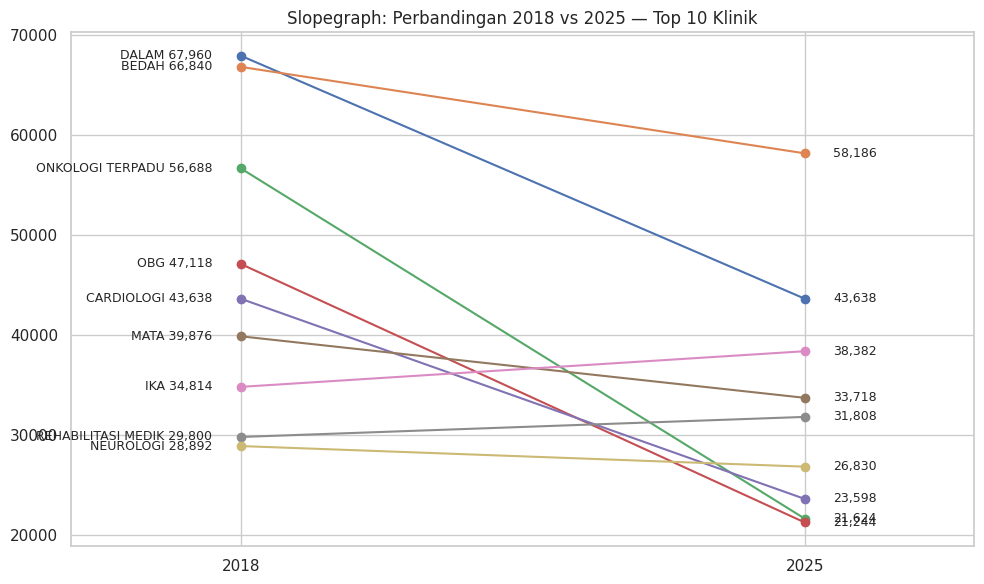

In [ ]:
# Menampilkan deskripsi grafik dengan format Markdown
display(Markdown("### Slopegraph — Top 10 Klinik: Awal vs Akhir Periode"))
display(Markdown("Menunjukkan perubahan jumlah dari tahun pertama ke tahun terakhir untuk top-10 klinik."))

# Mengambil top 10 klinik berdasarkan jumlah pasien kumulatif
top10 = fil_data.groupby('klinik')['jumlah'].sum().nlargest(10).index.tolist()

# Mengambil tahun pertama dan tahun terakhir dari data
first_year = fil_data['tahun'].min()
last_year = fil_data['tahun'].max()

# Mengelompokkan data untuk top-10 klinik berdasarkan tahun dan menghitung jumlah pasien
agg = fil_data[fil_data['klinik'].isin(top10)].groupby(['klinik', 'tahun'])['jumlah'].sum().reset_index()

# Mengambil jumlah pasien di tahun pertama dan tahun terakhir
first = agg[agg['tahun'] == first_year].set_index('klinik')['jumlah']
last = agg[agg['tahun'] == last_year].set_index('klinik')['jumlah']

# Membuat DataFrame yang berisi data awal dan akhir untuk plotting
df_slope = pd.DataFrame({'awal': first, 'akhir': last}).fillna(0).sort_values('awal', ascending=False)

# Membuat grafik slope
plt.figure(figsize=(10,6))
for i, r in df_slope.iterrows():  # Iterasi setiap klinik dan menggambar garis perbandingan
    plt.plot([0, 1], [r['awal'], r['akhir']], marker='o')  # Garis dari nilai awal ke nilai akhir
    # Menambahkan nilai awal dan akhir pada posisi yang sesuai
    plt.text(-0.05, r['awal'], f"{i} {int(r['awal']):,}", ha='right', va='center', fontsize=9)
    plt.text(1.05, r['akhir'], f"{int(r['akhir']):,}", ha='left', va='center', fontsize=9)

# Menambahkan label untuk tahun pertama dan terakhir
plt.xticks([0, 1], [str(first_year), str(last_year)])

# Menambahkan judul dan menyesuaikan layout
plt.title(f'Slopegraph: Perbandingan {first_year} vs {last_year} — Top 10 Klinik')
plt.xlim(-0.3, 1.3)
plt.tight_layout()

# Menampilkan grafik
plt.show()



**Analisis Grafik :**

Slopegraph ini memvisualisasikan perubahan jumlah pasien pada top 10 klinik antara dua periode waktu — tahun pertama dan tahun terakhir. Setiap garis yang menghubungkan titik-titik menunjukkan bagaimana jumlah pasien di setiap klinik telah berubah dari tahun pertama hingga tahun terakhir.

Temuan Utama :

* **Perubahan Signifikan :** Grafik ini memudahkan kita untuk melihat klinik-klinik mana yang mengalami peningkatan atau penurunan jumlah pasien yang signifikan selama periode tersebut. Misalnya, klinik yang garisnya bergerak naik menunjukkan pertumbuhan jumlah pasien, sementara klinik yang garisnya bergerak turun menunjukkan penurunan.

* **Klinik dengan Perubahan Terkecil :** **teks tebal**Klinis yang garisnya hampir horizontal mengindikasikan bahwa tidak ada perubahan signifikan dalam jumlah pasien selama periode tersebut.

**Kesimpulan Singkat :**

Slopegraph ini adalah alat yang sangat baik untuk melihat perbandingan langsung antara dua titik waktu. Dengan visualisasi ini, kita dapat dengan mudah mengidentifikasi tren dalam jumlah pasien untuk klinik-klinik tertentu dan menilai dampak perubahan tahunannya

**Cek Boxplot tahunan (untuk melihat variasi antar tahun) :**

### Boxplot Jumlah per Record per Tahun (Rawat Jalan)

Bandingkan sebaran nilai `jumlah` per record dari tahun ke tahun. Berguna untuk melihat konsistensi/kelainan.

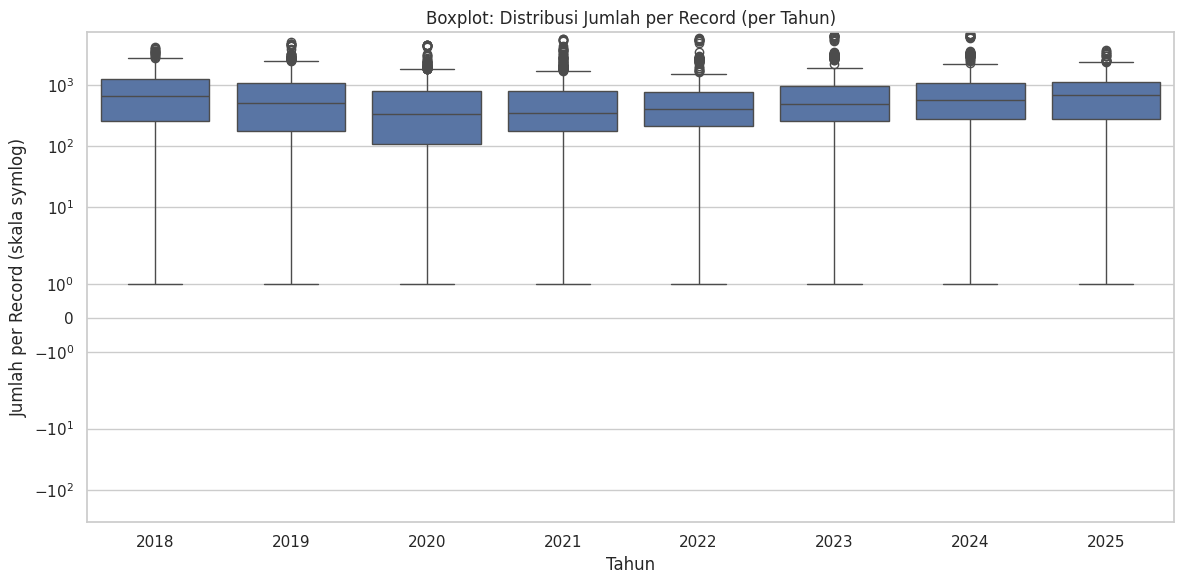

In [ ]:
# Menampilkan deskripsi grafik dengan format Markdown
display(Markdown("### Boxplot Jumlah per Record per Tahun (Rawat Jalan)"))
display(Markdown("Bandingkan sebaran nilai `jumlah` per record dari tahun ke tahun. Berguna untuk melihat konsistensi/kelainan."))

# Membuat ukuran kanvas grafik agar proporsional dan enak dibaca
plt.figure(figsize=(12,6))

# Membuat boxplot menggunakan seaborn untuk melihat distribusi jumlah pasien per record per tahun
# `x='tahun'` menunjukkan bahwa sumbu X adalah tahun, `y='jumlah'` untuk nilai jumlah pasien
sns.boxplot(data=fil_data, x='tahun', y='jumlah', showfliers=True)

# Menggunakan skala symlog pada sumbu Y untuk menangani distribusi yang sangat menyebar
plt.yscale('symlog')

# Menambahkan judul dan label sumbu
plt.title('Boxplot: Distribusi Jumlah per Record (per Tahun)')
plt.xlabel('Tahun')  # Sumbu X menunjukkan tahun
plt.ylabel('Jumlah per Record (skala symlog)')  # Sumbu Y menunjukkan jumlah pasien per record (skala symlog)

# Menyusun tata letak agar grafik terjaga proporsinya
plt.tight_layout()

# Menampilkan grafik
plt.show()



**Analisis Grafik :**

Boxplot ini memberikan gambaran yang jelas mengenai sebaran jumlah pasien per record (Rawat Jalan) setiap tahun. Grafik ini sangat berguna untuk melihat apakah ada fluktuasi yang signifikan, konsistensi, atau kelainan dalam data pasien dari tahun ke tahun.

**Temuan Utama :**

* Sebaran Interquartile Range (IQR): Boxplot memperlihatkan rentang interquartil (kotak) yang menggambarkan 50% data pasien berada. Jika kotaknya sangat lebar di suatu tahun, itu menunjukkan adanya variasi besar dalam jumlah pasien.

* Outliers (Pencilan): Titik di luar garis vertikal di atas atau di bawah kotak (whiskers) menunjukkan nilai yang sangat tinggi atau rendah dibandingkan dengan sebagian besar data. Outliers ini bisa merujuk pada kasus-kasus ekstrim atau kesalahan dalam pengumpulan data.

* Tren dari Tahun ke Tahun: Dengan melihat perubahan posisi kotak dan whisker dari tahun ke tahun, kita bisa melihat apakah ada perubahan yang signifikan pada sebaran jumlah pasien per tahun.

**Kesimpulan Singkat :**

Boxplot ini sangat efektif untuk memahami sebaran data dengan cepat dan mudah mendeteksi potensi masalah atau kelainan dalam data. Dengan menggunakan skala symlog, kita bisa lebih baik menangani data yang memiliki nilai ekstrim tanpa mengorbankan interpretasi data lainnya.

---



**Cek treemap interaktif komposisi klinik (Tahun 2025) :**

In [ ]:
# Visualisasi: Treemap Komposisi Klinik (Tahun Terakhir)

display(Markdown("### Treemap Komposisi Klinik (Tahun Terakhir)"))
display(Markdown(
    "Treemap ini menampilkan proporsi jumlah pasien yang ditangani oleh masing-masing klinik pada tahun terakhir. "
    "Ini adalah visualisasi yang sangat baik untuk menggambarkan kontribusi klinik terhadap total jumlah pasien secara komprehensif."
))

# Filter data untuk tahun terakhir
last_year = fil_data['tahun'].max()  # Mendapatkan tahun terakhir
rj_last = fil_data[fil_data['tahun'] == last_year].groupby('klinik')['jumlah'].sum().reset_index()

# Membuat treemap interaktif menggunakan Plotly
import plotly.express as px
fig = px.treemap(rj_last,
                 path=['klinik'],         # Menentukan kategori (path) yang ingin divisualisasikan
                 values='jumlah',         # Menampilkan jumlah pasien sebagai ukuran kotak
                 title=f'Komposisi Klinik di {last_year}')  # Menambahkan judul yang sesuai dengan tahun terakhir
fig.update_traces(textinfo='label+percent entry')  # Menampilkan label dan persentase di dalam kotak
fig.show()


### Treemap Komposisi Klinik (Tahun Terakhir)

Treemap ini menampilkan proporsi jumlah pasien yang ditangani oleh masing-masing klinik pada tahun terakhir. Ini adalah visualisasi yang sangat baik untuk menggambarkan kontribusi klinik terhadap total jumlah pasien secara komprehensif.

**Analisis Treemap :**

Pada Treemap Komposisi Klinik di tahun terakhir, terlihat dengan jelas kontribusi tiap klinik terhadap total pasien yang diterima. Tiap kotak dalam treemap menunjukkan jumlah pasien yang dilayani oleh masing-masing klinik, dengan ukuran kotak yang proporsional terhadap jumlah pasien.

* Bentuk visualisasi ini memudahkan kita untuk segera melihat klinik mana yang mendominasi dalam hal jumlah pasien. Klinik-klinik yang lebih besar memiliki kontribusi yang lebih tinggi, sedangkan yang lebih kecil menunjukkan peran yang lebih rendah.

* Persentase yang ditampilkan di setiap kotak memberikan gambaran lebih detail tentang kontribusi masing-masing klinik terhadap total pasien pada tahun tersebut.

**Insight Utama :**

* Jika ada klinik dengan kotak yang sangat besar, ini menunjukkan klinik tersebut menangani sebagian besar pasien pada tahun terakhir. Sebaliknya, klinik dengan kotak yang lebih kecil menunjukkan kontribusi yang relatif lebih kecil.

* Visualisasi ini dapat membantu stakeholder atau pihak manajemen rumah sakit untuk menilai kebutuhan sumber daya, seperti jumlah tenaga medis atau fasilitas, untuk klinik yang lebih besar, atau bahkan memberikan perhatian pada klinik dengan kontribusi lebih kecil agar dapat meningkatkan pelayanan.

**Kesimpulan Singkat :**

Treemap ini memberikan gambaran yang jelas mengenai kontribusi masing-masing klinik terhadap total pasien di tahun terakhir. Klinik dengan kotak yang lebih besar menunjukkan kontribusi yang lebih tinggi, sementara klinik dengan kotak lebih kecil memiliki kontribusi yang lebih rendah. Visualisasi ini memudahkan identifikasi klinik utama dan membantu pengambilan keputusan terkait pengalokasian sumber daya dan peningkatan pelayanan.

---



# **9. Kesimpulan**
Melalui proses eksplorasi dan visualisasi data, kita berhasil menyajikan gambaran yang lebih jelas mengenai tren dan pola dalam jumlah pasien IGD dan Rawat Jalan dari tahun ke tahun. Visualisasi seperti grafik batang, heatmap, radar chart, dan slopegraph memberikan insight mendalam mengenai kontribusi klinik, cara keluar pasien, serta hubungan antar metrik. Grafik total pasien per tahun menunjukkan fluktuasi jumlah pasien, sedangkan analisis pertumbuhan tahunan (YoY) memberi wawasan mengenai percepatan atau penurunan jumlah pasien setiap tahunnya. Stacked bar chart memperlihatkan distribusi cara keluar pasien IGD, memungkinkan kita untuk memetakan kategori yang dominan. Dengan analisis korelasi, kita juga dapat memahami sejauh mana keterkaitan antara IGD, Rawat Jalan, dan total pasien. Secara keseluruhan, visualisasi ini membantu kita mengidentifikasi area yang memerlukan perhatian lebih dan merencanakan strategi peningkatan layanan kesehatan yang lebih tepat sasaran.